<a href="https://colab.research.google.com/github/AnkitPatel745/Text-Data-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# improting reqired library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# Read the file
# Parse Error can be removed by ("error_bad_lines")
comment = pd.read_csv('/content/drive/MyDrive/Data Science Project(Self)/EDA Projects/GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [71]:
# First look 
comment.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [72]:
#!pip install textblob
from textblob import TextBlob

In [73]:
# Look for polarity of the first comment
TextBlob("It's more accurate to call it the M+ (1000) be...	").sentiment.polarity

0.45000000000000007

In [74]:
# Finding any null value
comment.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [75]:
# dropping null value
comment.dropna(inplace=True)

In [76]:
# Appendding polarity value 
polarity=[]
for i in comment['comment_text']:
   polarity.append(TextBlob(i).sentiment.polarity)

In [77]:
# Creating new polarity column
comment['polarity']=polarity

In [78]:
# First look
comment.head(20)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


In [79]:
# Consider only polarity 1 value
comment_positive = comment[comment['polarity']==1]

In [80]:
comment_positive.shape

(20400, 5)

In [81]:
#!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

In [82]:
# Unique Value
stopwords=set(STOPWORDS)

In [83]:
# Joining The Positive Comment 
total_comment=' ' .join(comment_positive['comment_text'])

In [84]:
# This data Is Too big in the github so comment it 
#total_comment

In [85]:
# Creating The Word Cloud
wordcloud=WordCloud(width=1000,height=500).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

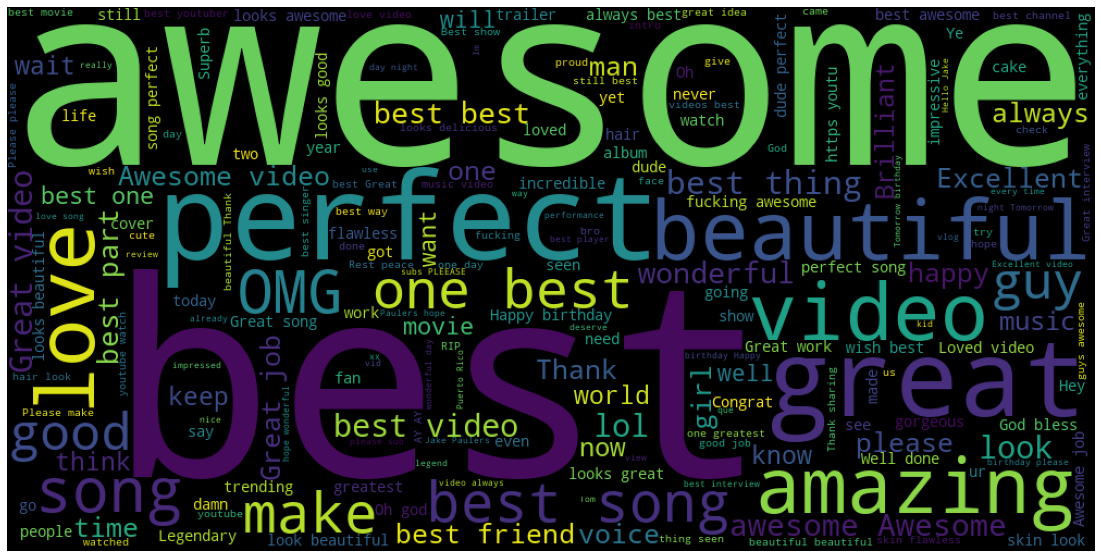

In [86]:
# Plot the Figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

In [87]:
# Consider only polarity -1 value
comment_negative = comment[comment['polarity']==-1]

In [88]:
# Joining The Nagative Comment 
total_comment=' ' .join(comment_negative['comment_text'])

In [89]:
# Creating The Word Cloud
wordcloud=WordCloud(width=1000,height=500).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

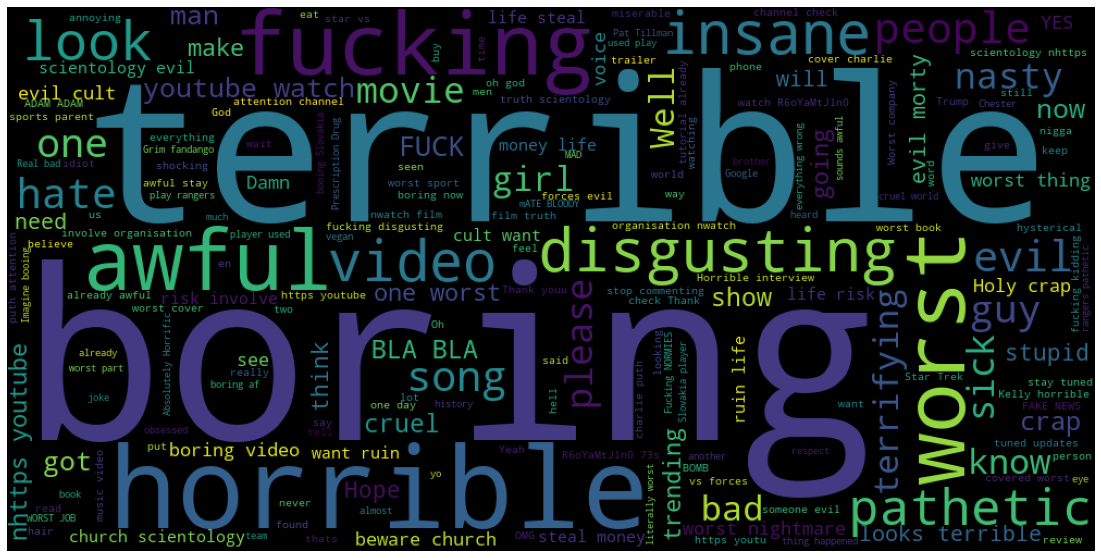

In [90]:
# Plot the Figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

## **Q1...  Analysing Tag Column , What Are The Trending Tags On YouTube ??**

In [91]:
## Path Of The Data
videos = pd.read_csv('/content/drive/MyDrive/Data Science Project(Self)/EDA Projects/USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [92]:
# First Look
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [93]:
# first look to the tags column only
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [94]:
# Joining The all Tags in the form of string
tags_string = ' '.join(videos['tags'])

In [95]:
# First look After Joining Tags
#tags_string

####**Conclusion**
The Given Tags Column contain some Noise or Special Charaters Which must be cleaned of before futher analysis.

In [96]:
# Importing The Regular Experession
import re

In [97]:
# substituting  the sapace in case of special charater or Noise
tags = re.sub('[^a-zA-Z]'," ",tags_string)

In [98]:
# first look
#tags

In [99]:
# Removing The Extra Space From The String
tags = re.sub(' +',' ',tags)

In [100]:
# First Look
#tags

In [101]:
# From the Word Cloud unique words in the tags 
wordcloud = WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

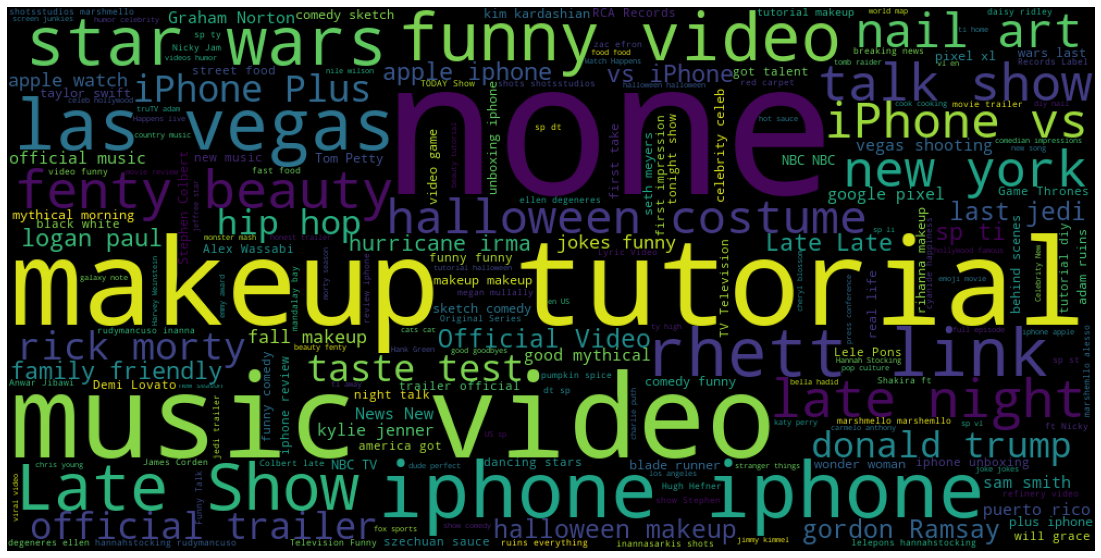

In [102]:
# Plotting the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

###**Q.2...Perform Analysis On Likes, Videos & Dislikes and Find How They Are Correlated To Each Other ???**

Text(0.5, 1.0, 'Regression Plot B/W Like & Views')

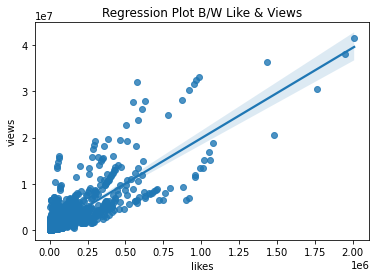

In [103]:
# Regression Plot
sns.regplot(data=videos,x='likes',y='views')
plt.title("Regression Plot B/W Like & Views")


Text(0.5, 1.0, 'Regression Plot B/W DisLike & Views')

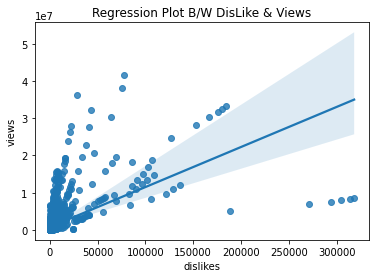

In [104]:
# Regression Plot
sns.regplot(data=videos,x='dislikes',y='views')
plt.title("Regression Plot B/W DisLike & Views")

In [105]:
df_corr = videos[['views','likes','dislikes']]

In [106]:
df_corr.corr()

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

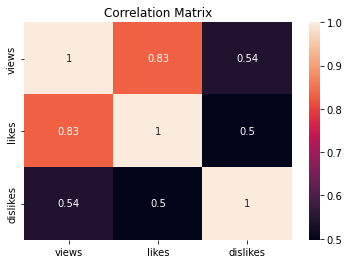

In [107]:
# Heat Map
sns.heatmap(df_corr.corr(),annot=True)
plt.title("Correlation Matrix")

###**Q....-> Analysis Of Emoji's In Comments...???**

In [108]:
# First look
comment.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [109]:
# Need to Extract Emojis Form the comment_tag
comment['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [110]:
pip install emoji==0.6.0

In [111]:
# Importing Libarary
import emoji

In [112]:
# sorting out emoji from the string
comments = comment['comment_text'][1]

In [113]:
# taking out the no of emoji's
[c for c in comments if c in emoji.UNICODE_EMOJI]

['😂', '😂', '😂']

In [114]:
# sorting out emoji's from the data 
str=""
for i in comment['comment_text']:
  list=[c for c in i if c in emoji.UNICODE_EMOJI]
  for ele in list:
    str=str+ele  

In [115]:
# Number of emojis
len(str)

341868

In [116]:
# first look
#str

In [117]:
# sorting it in its unique number and frequency
result={}
for i in set(str):
  result[i]=str.count(i)

In [118]:
#First Look
#result

In [119]:
# Stated in list format
#result.items()

In [120]:
# Sorting it out in the proper manner in the of dicionary 
final = {}
for key,value in sorted(result.items(),key = lambda item:item[1]):
  final[key]=value

In [121]:
##first look
#final

In [122]:
# Using The Unzip Operator For Only Emojis
keys = [*final.keys()]

In [131]:
# First Lool
keys

['🤺',
 '🥚',
 '🥟',
 '🥜',
 '🤹',
 '🧤',
 '🧠',
 '🦓',
 '🥌',
 '🤾',
 '🤽',
 '🛷',
 '🤟',
 '🥨',
 '🥡',
 '🦏',
 '🧣',
 '🛒',
 '🥅',
 '🦔',
 '🧘',
 '🦖',
 '🤱',
 '🧡',
 '🧢',
 '🎌',
 '🧝',
 '🦕',
 '🧒',
 '🧛',
 '🤯',
 '🥄',
 '🥖',
 '🧐',
 '🤫',
 '🤨',
 '♾',
 '⏯',
 '⏏',
 '🏷',
 '🛣',
 '🥝',
 '⏹',
 '🗂',
 '🖇',
 '🤵',
 '🗄',
 '⚗',
 '🧟',
 '🖍',
 '⏸',
 '🦆',
 '🛬',
 '☦',
 '🤬',
 '🛢',
 '♟',
 '🦍',
 '🥞',
 '🗓',
 '💹',
 '⚙',
 '☸',
 '🏌',
 '🥈',
 '🦐',
 '⏲',
 '⛱',
 '🕹',
 '🚎',
 '↕',
 '☂',
 '🔤',
 '㊙',
 '🔃',
 '🔚',
 '🚠',
 '🔠',
 '🖨',
 '❎',
 '🤮',
 '⌨',
 '♦',
 '🆔',
 '🈹',
 '🌫',
 '🔄',
 '🕎',
 '🗜',
 '↩',
 '↔',
 '🈁',
 '🚉',
 '🔂',
 '🥉',
 '🧖',
 '🛤',
 '↪',
 '🎐',
 '⛴',
 '🧜',
 '🥛',
 '⛏',
 '🖼',
 '🛋',
 '🔁',
 '♠',
 '⛸',
 '➿',
 '⏺',
 '🖲',
 '🚟',
 '🔡',
 '🖊',
 'Ⓜ',
 '🔖',
 '🈵',
 '🆎',
 '✡',
 '🈲',
 'ℹ',
 '🈂',
 '⚾',
 '🗳',
 '🔼',
 '🚻',
 '◽',
 '🗒',
 '⚒',
 '🈯',
 '🆖',
 '🗞',
 '🛥',
 '◻',
 '🦒',
 '🔣',
 '🗃',
 '🛂',
 '🔢',
 '🈳',
 '🚁',
 '🏮',
 '↖',
 '🚛',
 '🔲',
 '🈴',
 '🔳',
 '🌥',
 '⏬',
 '⏮',
 '🏧',
 '🌉',
 '🚇',
 '🥘',
 '♻',
 '🆕',
 '🏐',
 '🕍',
 '🎟',
 '⛹',
 '📧',
 '🕰',
 '🛑',
 '🛁',
 '🧞',
 '🚺',
 '🛃'

In [124]:
# unzipping the Value Of Dictionary
values = [*final.values()]

In [132]:
# First Look
#values

In [126]:
# Top 20 Emojis which are used in Mostly
df = pd.DataFrame({'char':keys[-20:],'num':values[-20:]})

In [127]:
# First look
df

,char,num
0,🙌,2734
1,🏼,2961
2,💙,2968
3,💗,3071
4,👌,3534
5,💜,3616
6,🏻,4412
7,💖,4809
8,😊,4946
9,👏,5357


In [129]:
# Bar Plot For Top 20 Emojis
trace = go.Bar(
    x=df['char'],
    y=df['num'])

iplot([trace])

In [133]:
iplot([trace])